<a href="https://colab.research.google.com/github/pallavi-vishnu/global_supermarket/blob/main/global_supermarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import packages and load data

In [11]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Load the data
df = pd.read_csv("Global Superstore.txt", sep='\t', on_bad_lines='skip')



# Explore and Clean Data

In [12]:
df.head()


,Category,City,Country,Customer ID,Customer Name,Discount,Market,记录数,Order Date,Order ID,...,Sales,Segment,Ship Date,Ship Mode,Shipping Cost,State,Sub-Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


In [13]:
# Check for missing values:

df.isnull().sum()


,0
Category,0
City,0
Country,0
Customer ID,0
Customer Name,0
Discount,0
Market,0
记录数,0
Order Date,0
Order ID,0


In [14]:
df.dtypes


,0
Category,object
City,object
Country,object
Customer ID,object
Customer Name,object
Discount,float64
Market,object
记录数,int64
Order Date,object
Order ID,object


In [15]:
# Convert order_date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])




# Exploratory Data Analysis (EDA)

In [16]:
# General Overview of Sales and Profit

total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()

print(f'Total Sales: ${total_sales:.2f}')
print(f'Total Profit: ${total_profit:.2f}')


Total Sales: $12642905.00
Total Profit: $1467457.29


<Figure size 1000x600 with 0 Axes>

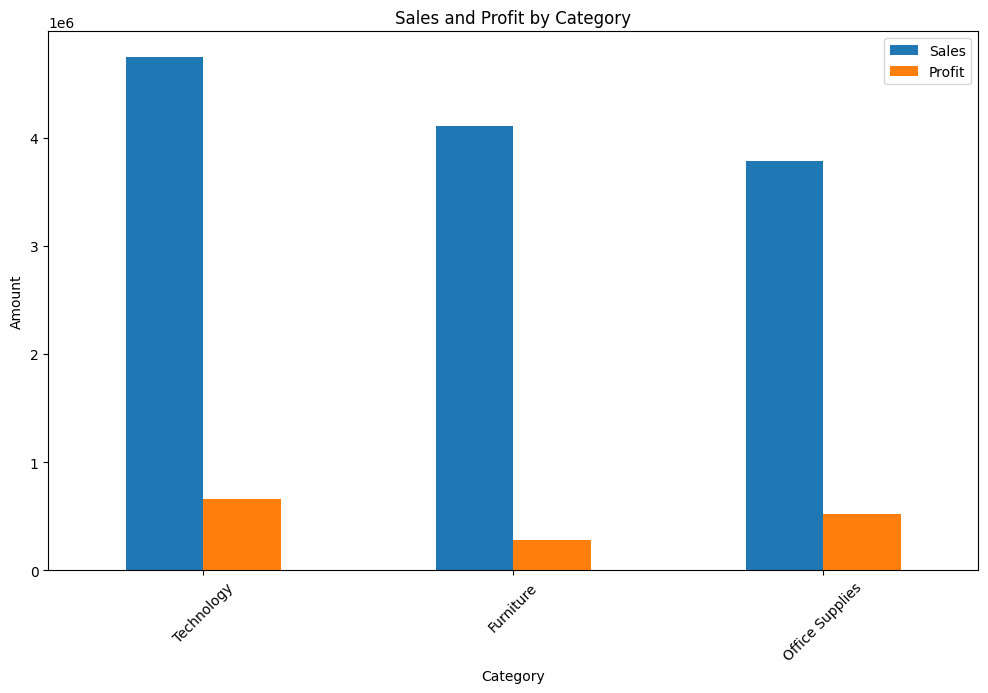

In [18]:
# Sales and Profit by Category

category_sales_profit = df.groupby('Category')[['Sales', 'Profit']].sum().reset_index()
category_sales_profit = category_sales_profit.sort_values(by='Sales', ascending=False)

# Plot a bar chart to compare sales and profit by category
plt.figure(figsize=(10, 6))
category_sales_profit.plot(x='Category', y=['Sales', 'Profit'], kind='bar', stacked=False, figsize=(12, 7))
plt.title('Sales and Profit by Category')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()


<Figure size 1000x600 with 0 Axes>

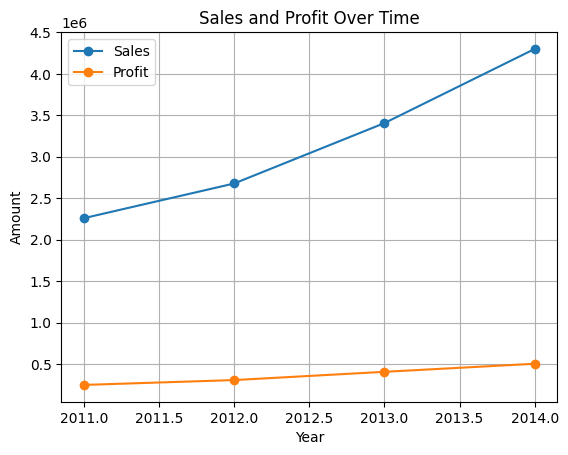

In [19]:
# Sales and Profit Trends Over Time

# Group by year to analyze sales and profit trends
yearly_sales_profit = df.groupby('Year')[['Sales', 'Profit']].sum()

# Plot sales and profit trends over time
plt.figure(figsize=(10, 6))
yearly_sales_profit.plot(kind='line', marker='o')
plt.title('Sales and Profit Over Time')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend(['Sales', 'Profit'])
plt.grid(True)
plt.show()

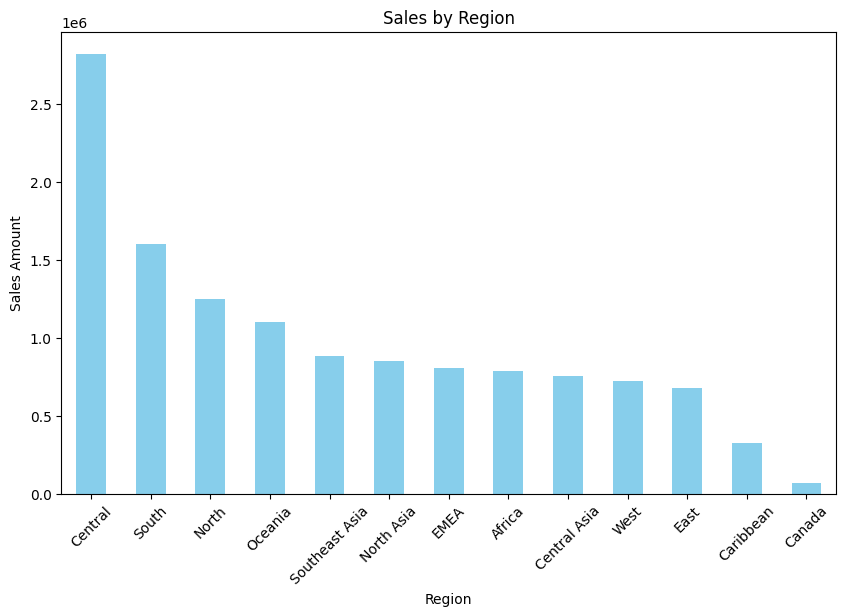

In [20]:
# Sales by Region

# Group by region
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

# Plot sales by region
plt.figure(figsize=(10, 6))
region_sales.plot(kind='bar', color='skyblue')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.show()


<!-- Analyzing Customer Behavior -->

 # Analyzing Customer Behavior

<ipython-input-21-a6be15172aae>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='Sales', data=segment_sales_profit, palette='viridis')


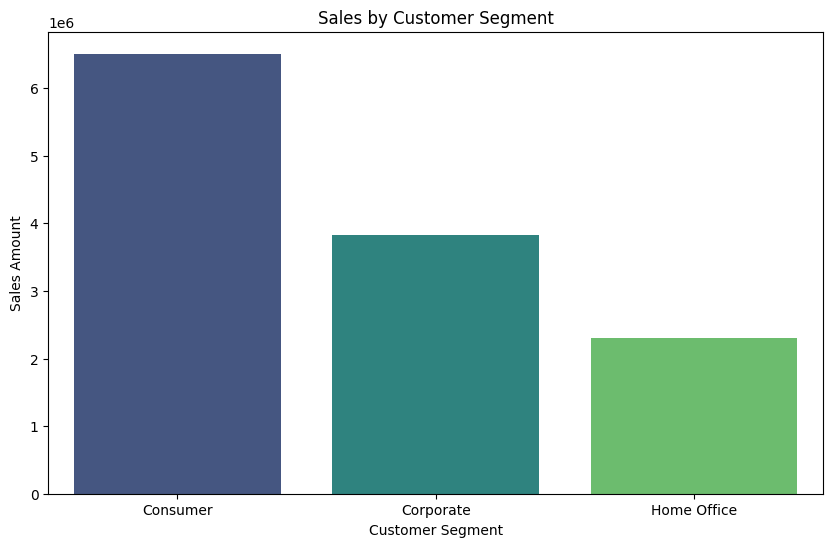

<ipython-input-21-a6be15172aae>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='Profit', data=segment_sales_profit, palette='viridis')


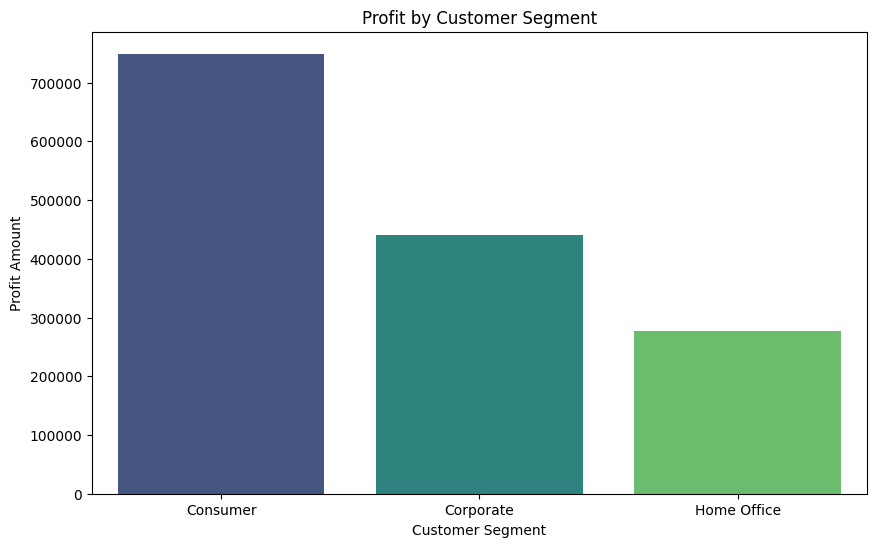

In [21]:
# Group by customer segment

segment_sales_profit = df.groupby('Segment')[['Sales', 'Profit']].sum().reset_index()

# Plot sales and profit by customer segment
plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Sales', data=segment_sales_profit, palette='viridis')
plt.title('Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Sales Amount')
plt.show()

# Similarly, plot for profit
plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Profit', data=segment_sales_profit, palette='viridis')
plt.title('Profit by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Profit Amount')
plt.show()


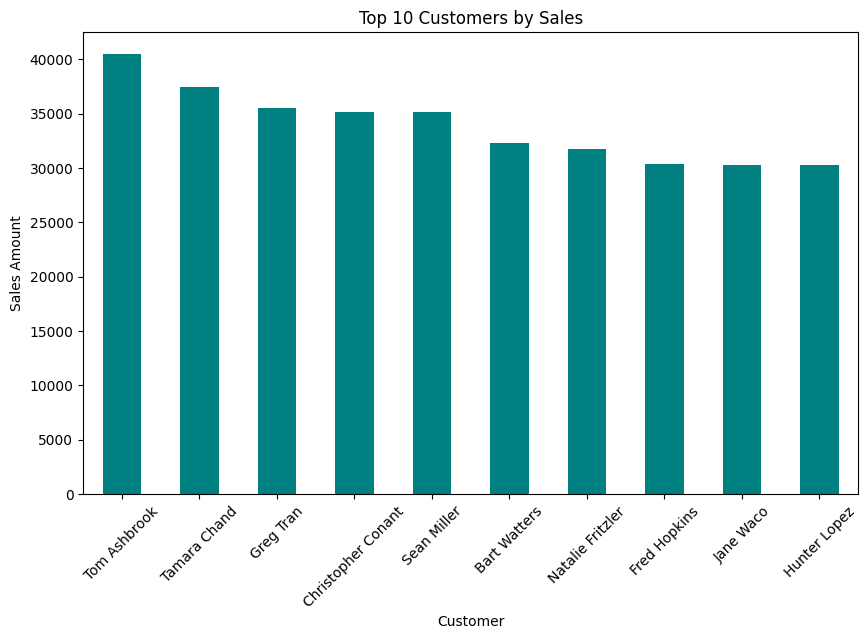

In [22]:
# Top Customers by Sales

top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)

# Plot top 10 customers by sales
plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar', color='teal')
plt.title('Top 10 Customers by Sales')
plt.xlabel('Customer')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.show()


# Profitability Analysis

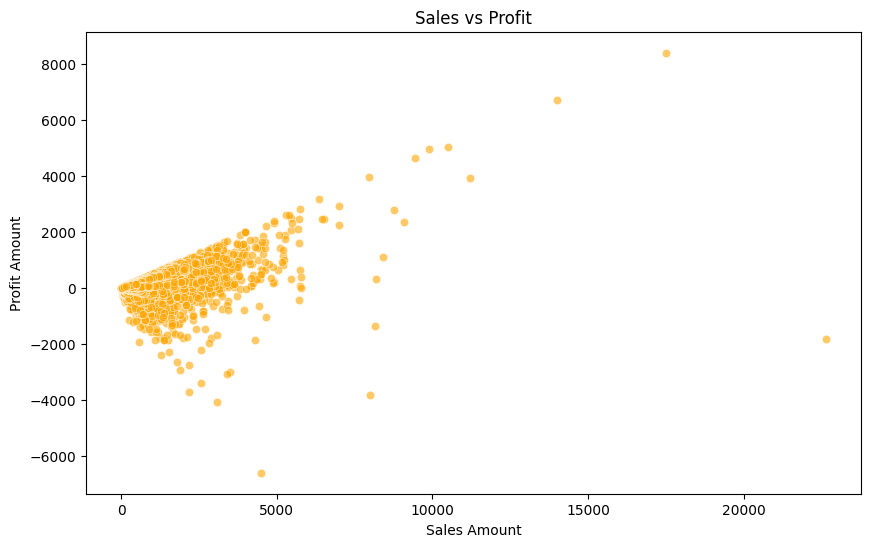

In [23]:
# Sales vs. Profit Analysis

# Scatter plot of Sales vs. Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', data=df, alpha=0.6, color='orange')
plt.title('Sales vs Profit')
plt.xlabel('Sales Amount')
plt.ylabel('Profit Amount')
plt.show()


<Figure size 1000x600 with 0 Axes>

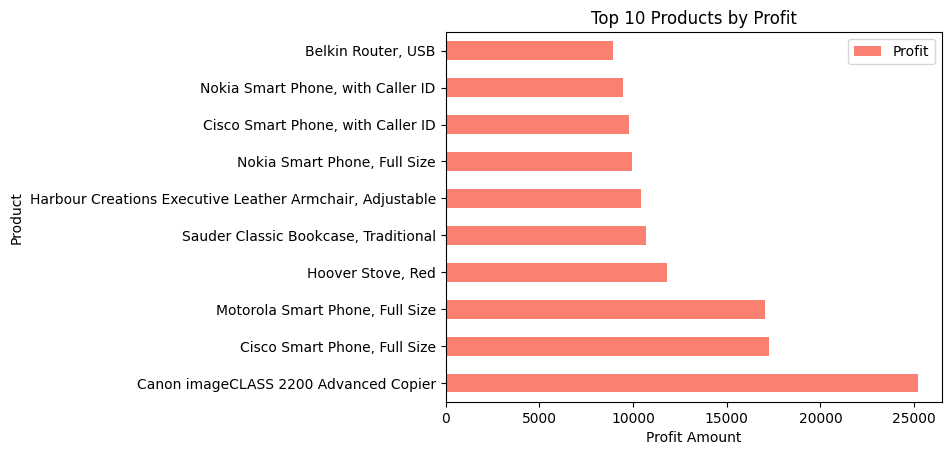

In [24]:
#  Profit by Product

product_profit = df.groupby('Product Name')[['Profit']].sum().sort_values(by='Profit', ascending=False)

# Plot top 10 products by profit
plt.figure(figsize=(10, 6))
product_profit.head(10).plot(kind='barh', color='salmon')
plt.title('Top 10 Products by Profit')
plt.xlabel('Profit Amount')
plt.ylabel('Product')
plt.show()
